In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy import signal

%matplotlib notebook


## Solving wave equation using Convolution


In [5]:
dt = 1e-2
dx = 1e-2
dy = 1e-2
c = 1
r = (c*dt/dx)
alpha = -4 + 2/r**2

In [10]:
x_end = 1
y_end = 1
t_end = 1
xList = np.arange(0,x_end,dx)
yList = np.arange(0,y_end,dy)
X,Y = np.meshgrid(xList, yList)
tList = np.arange(0,t_end, dt)

Mx = xList.shape[0]
N = tList.shape[0]

F = np.sin(2*X)*np.sin(Y)
FDot = np.zeros(F.shape)
FData = np.zeros((Mx,Mx,N))

<IPython.core.display.Javascript object>


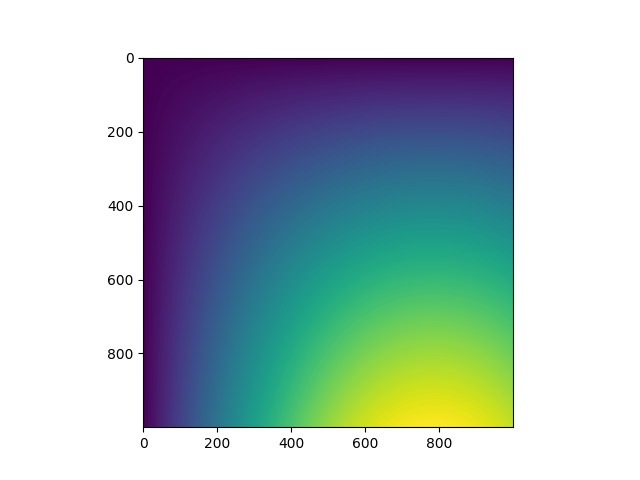

In [8]:
plt.imshow(F)

<IPython.core.display.Javascript object>


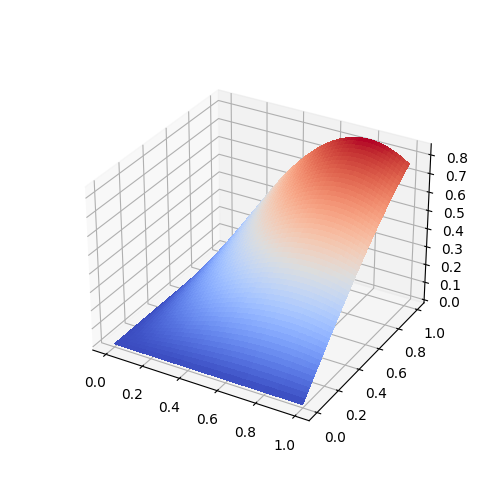

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5,5))
surf = ax.plot_surface(X, Y, F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#### Now let's construc the kernel for convolution

In [11]:
M = np.ones((3,3), dtype='float')
M[0,0] = 0
M[0,-1] = 0
M[-1,-1] = 0
M[-1,0] = 0
M[1,1] = alpha

In [12]:
M

array([[0., 1., 0.],
       [1., 4., 1.],
       [0., 1., 0.]])

#### Let's evaluate the effect of the kernel on an image

<IPython.core.display.Javascript object>


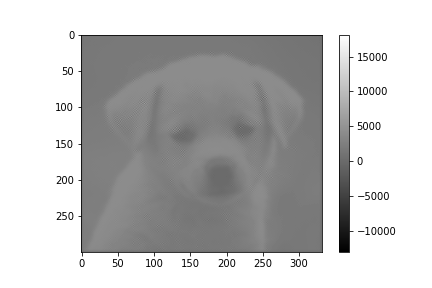

In [310]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


image = plt.imread('image.jpg')
image = rgb2gray(image)
plt.imshow(image, 'gray')

for i in range(4):
    image = signal.convolve2d(image, M, 'same')

plt.imshow(image, 'gray')
plt.colorbar()

### Let's now run the simulation

In [197]:
dt = 0.01*1e-2
dx = 0.5*1e-2
dy = dx
c = 25
r = (c*dt/dx)
alpha = -4 + 2/r**2

x_end = 1
y_end = 1
t_end = 0.5
xList = np.arange(0,x_end,dx)
yList = np.arange(0,y_end,dy)
X,Y = np.meshgrid(xList, yList)
tList = np.arange(0,t_end, dt)

Mx = xList.shape[0]
N = tList.shape[0]

F = np.sin(2*X)*np.sin(Y)
FDot = np.zeros(F.shape)
FData = np.zeros((Mx,Mx,N))



In [198]:
F = np.sin(2*X)*np.sin(Y)
#F = np.exp(((X-0.15)**2+(Y-0.55)**2)/(2)**2)
FDot = np.zeros(F.shape)
FData = np.zeros((Mx,Mx,N))

<IPython.core.display.Javascript object>


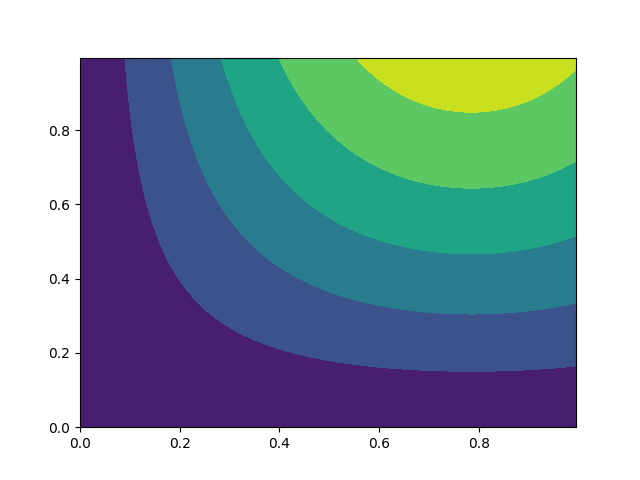

In [199]:
plt.contourf(X,Y,F)

In [200]:
F_1 = 0.5* r**2  *signal.convolve2d(F,M,'same') 
FData[:,:,0] = F
FData[:,:,1] = F_1

F_aux = np.copy(F)
F = np.copy(F_1)
F_pre = np.copy(F_aux)
for t in range(2,N):
    F_aux = np.copy(F)
    F = r**2 * signal.convolve2d(F,M,'same') - F_pre
    F_pre = np.copy(F_aux)
    FData[:,:,t] = F
    

<IPython.core.display.Javascript object>


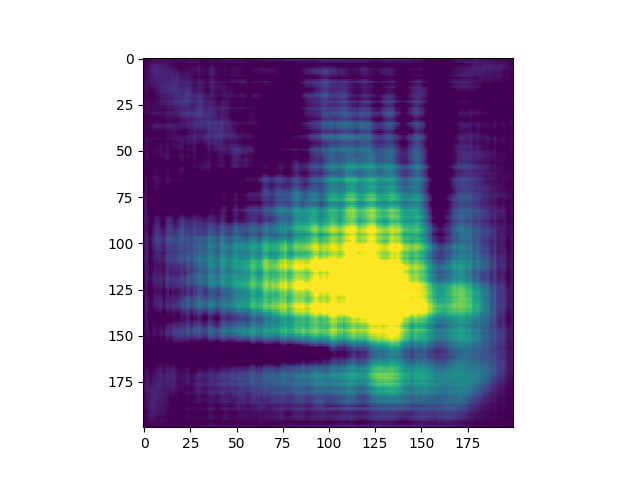

In [204]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()
im=plt.imshow(FData[:,:,0],interpolation='none')
# initialization function: plot the background of each frame
def init():
    im.set_data(np.random.random((5,5)))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(FData[:,:,i])
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=3, blit=True)

<IPython.core.display.Javascript object>


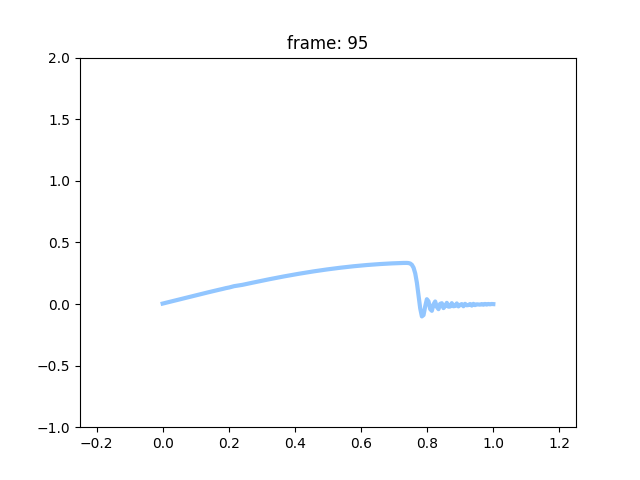

/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [202]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.25,1.25])
    ax.set_ylim([-1,2])
    return line,
def animate(i):
    ydata = FData[:,:,i][80,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=10, blit=True)


In [ ]:
plt.imshow(FData[:,:,4])
plt.colorbar()

<IPython.core.display.Javascript object>


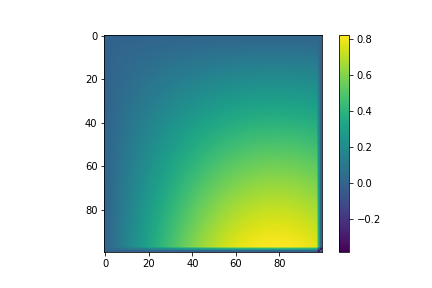

In [382]:
img = np.ones((10,10))
plt.imshow(img)

In [394]:
img = signal.convolve2d(img,M,'same')
img.shape

(10, 10)

In [395]:
plt.imshow(img)

In [393]:
M

array([[ 0.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1.,  0.]])

In [358]:
img

array([[-1.17853610e+08,  1.77204216e+08, -1.64069734e+08,
         1.06075610e+08, -3.54445880e+07, -3.54445880e+07,
         1.06075610e+08, -1.64069734e+08,  1.77204216e+08,
        -1.17853610e+08],
       [ 1.77204216e+08, -2.65083868e+08,  2.43500022e+08,
        -1.55952994e+08,  5.17755650e+07,  5.17755650e+07,
        -1.55952994e+08,  2.43500022e+08, -2.65083868e+08,
         1.77204216e+08],
       [-1.64069734e+08,  2.43500022e+08, -2.20810948e+08,
         1.39321291e+08, -4.57110900e+07, -4.57110900e+07,
         1.39321291e+08, -2.20810948e+08,  2.43500022e+08,
        -1.64069734e+08],
       [ 1.06075610e+08, -1.55952994e+08,  1.39321291e+08,
        -8.62716100e+07,  2.79349490e+07,  2.79349490e+07,
        -8.62716100e+07,  1.39321291e+08, -1.55952994e+08,
         1.06075610e+08],
       [-3.54445880e+07,  5.17755650e+07, -4.57110900e+07,
         2.79349490e+07, -8.92140400e+06, -8.92140400e+06,
         2.79349490e+07, -4.57110900e+07,  5.17755650e+07,
        -3.

<IPython.core.display.Javascript object>


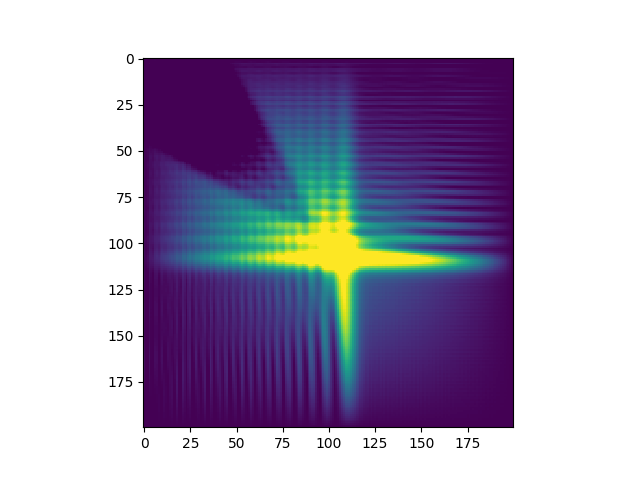

## Tests

In [86]:
Q = np.arange(0,10,0.01)*(1+0*1j)

Q1,Q2 = np.meshgrid(Q,Q)
mask = np.zeros(Q1.shape)

def landa(Q):
    return (-(Q-2)+((Q-2)**2-(4))**0.5)/(2), (-(Q-2)-((Q-2)**2-(4))**0.5)/(2)

landa1, landa2 = landa(Q1+Q2)
landa1 = np.abs(landa1)
landa2 = np.abs(landa2)


In [87]:
landa1

array([[1.        , 1.        , 1.        , ..., 0.12751053, 0.12734547,
        0.12718085],
       [1.        , 1.        , 1.        , ..., 0.12734547, 0.12718085,
        0.12701665],
       [1.        , 1.        , 1.        , ..., 0.12718085, 0.12701665,
        0.12685289],
       ...,
       [0.12751053, 0.12734547, 0.12718085, ..., 0.05591564, 0.05588429,
        0.05585298],
       [0.12734547, 0.12718085, 0.12701665, ..., 0.05588429, 0.05585298,
        0.05582171],
       [0.12718085, 0.12701665, 0.12685289, ..., 0.05585298, 0.05582171,
        0.05579047]])

In [92]:
mask[(np.abs(landa1)<=1)*(np.abs(landa2)<=1)] = 1

<IPython.core.display.Javascript object>


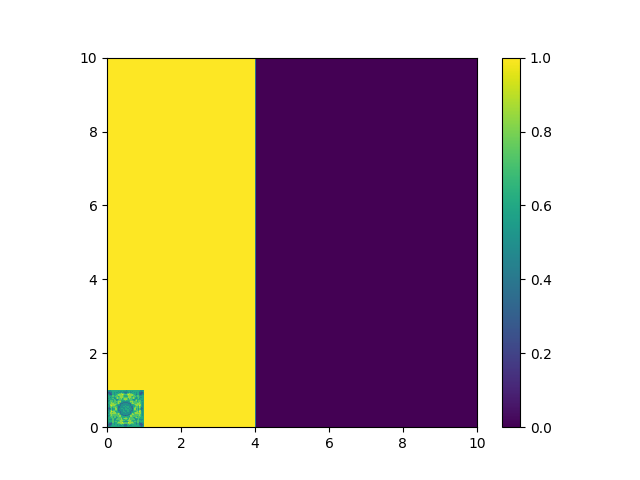

In [93]:
plt.imshow(mask, extent=[0,10,0,10])
plt.colorbar()

In [75]:
landa1<=1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])